<a href="https://colab.research.google.com/github/HajidMunhbat/hajid.github.io/blob/main/Student_Performance_Mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle 
from matplotlib import style
data = pd.read_csv('student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
predict = 'G3'

x = np.array(data.drop(['G3'], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
'''
best = 0
for _ in range(30):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
  linear = linear_model.LinearRegression()

  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  print(acc)

  if acc > best:
    best = acc
    with open('studentmodel.pickle', 'wb') as f:
      pickle.dump(linear, f)'''

0.8377261374315134
0.8486143757124364
0.7678293561736069
0.8023227019749749
0.8213913837944885
0.7720839136429414
0.921105629712309
0.901364300848894
0.8312009033548287
0.8441569037795779
0.8281073536862515
0.7734524443605254
0.8058641196619559
0.7669113365687734
0.7309145549655185
0.777987930551545
0.8123035264287811
0.7074352174575358
0.8493066503653142
0.8676803913348174
0.9126143318232542
0.8003905352124715
0.8320845993387388
0.8638476129776577
0.8513301158802052
0.7675839790142098
0.8093555088090143
0.8158464659876115
0.7171944841912218
0.8520357746802549


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [8]:
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

In [9]:
print('Co: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Co: 
 [ 0.14589786  0.99536554 -0.19726742 -0.1819805   0.03783103]
Intercept: 
 -1.6172262344150177


In [10]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
  print(predictions[x], x_test[x], y_test[x])

18.955233788992516 [18 18  1  0  6] 18
15.258514095461265 [15 15  2  0  4] 15
9.476535017149295 [10 10  2  0  2] 11
-0.8222151175713108 [12  0  3  2  0] 0
14.915348807921507 [14 15  3  0  4] 16
13.075941850131967 [14 13  3  0  8] 14
8.963179362475815 [ 7 10  2  0  0] 11
12.81122317572198 [10 13  1  0  6] 13
14.141543193965413 [15 14  3  0  6] 14
16.32411543929471 [16 16  2  0  2] 17
15.182852035603808 [15 15  2  0  2] 14
5.285243389354747 [6 7 2 3 0] 0
13.046223093160679 [14 13  2  0  2] 13
14.090173636303005 [16 14  4  0  6] 15
11.683399764673645 [12 12  2  0  0] 11
14.909922553145268 [15 15  3  0  0] 15
3.8458800585522424 [5 5 2 0 4] 6
10.939312907688839 [13 11  3  0  8] 11
4.911481402385688 [6 6 2 0 2] 6
14.961292110807676 [14 15  2  0  0] 15
7.118346149910035 [8 8 2 0 0] 0
12.900325228222004 [13 13  2  0  2] 11
13.208399722428073 [12 13  2  0 14] 12
8.359564115653443 [10  9  3  0  4] 9
11.9391128621811 [15 12  2  1  0] 12
14.314518114371447 [14 14  1  0  4] 14
10.784409465847627 [1

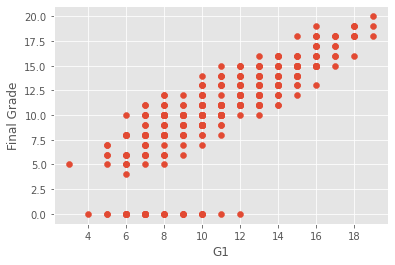

In [11]:
p = 'G1'
style.use('ggplot')
pyplot.scatter(data[p], data['G3'])
pyplot.xlabel(p)
pyplot.ylabel('Final Grade')
pyplot.show()